## Actividad de clase 3: Procesamiento de datos
### Eliuth Montiel Navarrete

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
df = pd.read_csv('clientes_compras_simulado.csv')
df.head()

,ID_cliente,Nombre_cliente,Edad,Género,Estado_civil,Ingreso_anual,Número_hijos,País,Fecha_registro,Frecuencia_compra,Calificación_satisfacción,Producto_frecuente,Email,Descuento_promedio,Activo,Código_postal,Comentarios_cliente,Días_desde_última_compra,Rango_crediticio,Comprará_de_nuevo
0,C1000,Jorge Escobar,56.0,Otro,Soltero,113145.0,3.0,México,2022-12-10,7.5,4.7,Hogar,william99@martin-allen.org,39.0,NaN,10223,Eat care even treatment also whether camera.,428.0,Bajo,1
1,C1001,Holly Barr,69.0,M,Soltero,156430.0,0.0,Colombia,2022-02-25,12.1,0.2,Electrónica,robertsaustin@hotmail.com,49.0,NaN,41752,Require alone back close may worker of goal.,1292.0,Medio,1
2,C1002,Brian Robinson,46.0,M,Soltero,104914.0,NaN,Chile,2021-09-04,18.1,9.4,Belleza,lanesusan@yahoo.com,9.0,1.0,38085,Source difficult think girl group.,1732.0,Alto,1
3,C1003,Mr. John Horn,32.0,NaN,NaN,112870.0,0.0,Argentina,2021-01-18,11.5,1.9,Hogar,mmartinez@hester.com,24.0,0.0,72994,Lead rock grow money story case.,1560.0,Bajo,1
4,C1004,Tiffany Thomas,60.0,Otro,Divorciado,126243.0,3.0,Argentina,2020-12-03,8.0,8.0,Ropa,ysilva@yahoo.com,99.0,0.0,79120,Receive number pass people gun.,147.0,Premium,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_cliente                 500 non-null    object 
 1   Nombre_cliente             500 non-null    object 
 2   Edad                       489 non-null    float64
 3   Género                     368 non-null    object 
 4   Estado_civil               395 non-null    object 
 5   Ingreso_anual              500 non-null    float64
 6   Número_hijos               417 non-null    float64
 7   País                       500 non-null    object 
 8   Fecha_registro             500 non-null    object 
 9   Frecuencia_compra          500 non-null    float64
 10  Calificación_satisfacción  499 non-null    float64
 11  Producto_frecuente         500 non-null    object 
 12  Email                      500 non-null    object 
 13  Descuento_promedio         493 non-null    float64

In [4]:
df.describe(include = "all")

,ID_cliente,Nombre_cliente,Edad,Género,Estado_civil,Ingreso_anual,Número_hijos,País,Fecha_registro,Frecuencia_compra,Calificación_satisfacción,Producto_frecuente,Email,Descuento_promedio,Activo,Código_postal,Comentarios_cliente,Días_desde_última_compra,Rango_crediticio,Comprará_de_nuevo
count,500,500,489.000000,368,395,500.000000,417.000000,500,500,500.000000,499.000000,500,500,493.000000,325.000000,500.000000,500,500.000000,500,500.000000
unique,500,497,NaN,3,4,NaN,NaN,4,442,NaN,NaN,5,500,NaN,NaN,NaN,500,NaN,4,NaN
top,C1499,Michael Davidson,NaN,M,Soltero,NaN,NaN,Chile,2022-03-06,NaN,NaN,Hogar,sherri96@hotmail.com,NaN,NaN,NaN,Like rather bring region indicate watch.,NaN,Medio,NaN
freq,1,2,NaN,136,109,NaN,NaN,135,3,NaN,NaN,106,1,NaN,NaN,NaN,1,NaN,139,NaN
mean,NaN,NaN,51.020450,NaN,NaN,108799.998000,1.978417,NaN,NaN,9.870400,4.976353,NaN,NaN,26.281947,0.483077,49265.374000,NaN,945.794000,NaN,0.564000
std,NaN,NaN,20.210359,NaN,NaN,54937.305962,1.438487,NaN,NaN,5.994911,3.038568,NaN,NaN,18.330070,0.500484,28215.571171,NaN,524.290867,NaN,0.496384
min,NaN,NaN,18.000000,NaN,NaN,10526.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,695.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,35.000000,NaN,NaN,60006.500000,1.000000,NaN,NaN,4.400000,2.200000,NaN,NaN,12.000000,0.000000,26827.750000,NaN,505.500000,NaN,0.000000
50%,NaN,NaN,50.000000,NaN,NaN,107825.500000,2.000000,NaN,NaN,9.900000,5.000000,NaN,NaN,25.000000,0.000000,50204.500000,NaN,972.500000,NaN,1.000000
75%,NaN,NaN,66.000000,NaN,NaN,158602.000000,3.000000,NaN,NaN,15.000000,7.600000,NaN,NaN,39.000000,1.000000,72127.000000,NaN,1394.250000,NaN,1.000000


In [5]:
#Eliminar columnas.
df.drop(columns=['ID_cliente', 'Nombre_cliente', 'Email', 'Fecha_registro'], inplace=True)
df.head()

,Edad,Género,Estado_civil,Ingreso_anual,Número_hijos,País,Frecuencia_compra,Calificación_satisfacción,Producto_frecuente,Descuento_promedio,Activo,Código_postal,Comentarios_cliente,Días_desde_última_compra,Rango_crediticio,Comprará_de_nuevo
0,56.0,Otro,Soltero,113145.0,3.0,México,7.5,4.7,Hogar,39.0,NaN,10223,Eat care even treatment also whether camera.,428.0,Bajo,1
1,69.0,M,Soltero,156430.0,0.0,Colombia,12.1,0.2,Electrónica,49.0,NaN,41752,Require alone back close may worker of goal.,1292.0,Medio,1
2,46.0,M,Soltero,104914.0,NaN,Chile,18.1,9.4,Belleza,9.0,1.0,38085,Source difficult think girl group.,1732.0,Alto,1
3,32.0,NaN,NaN,112870.0,0.0,Argentina,11.5,1.9,Hogar,24.0,0.0,72994,Lead rock grow money story case.,1560.0,Bajo,1
4,60.0,Otro,Divorciado,126243.0,3.0,Argentina,8.0,8.0,Ropa,99.0,0.0,79120,Receive number pass people gun.,147.0,Premium,1


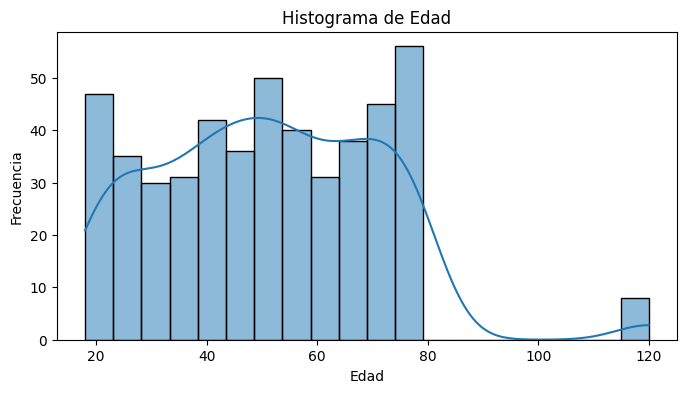

None


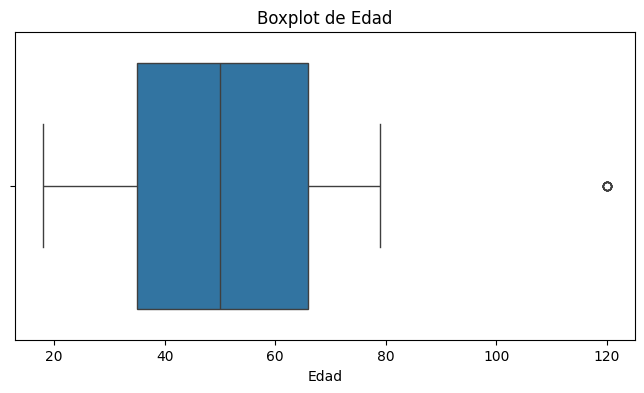

None


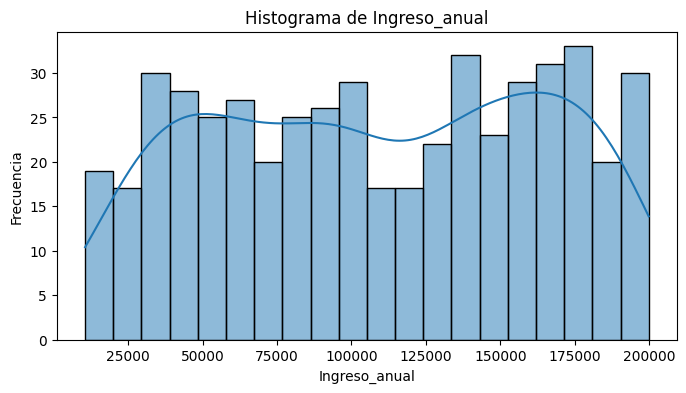

None


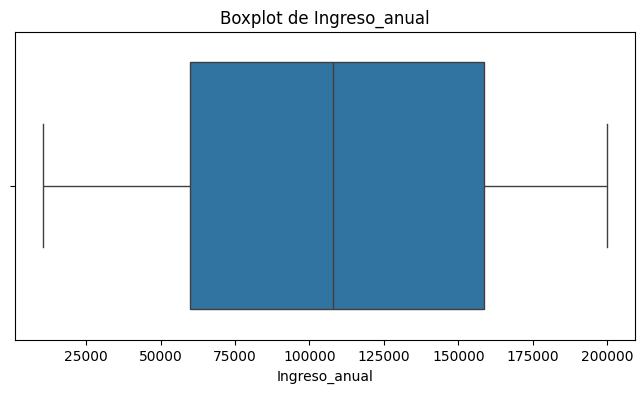

None


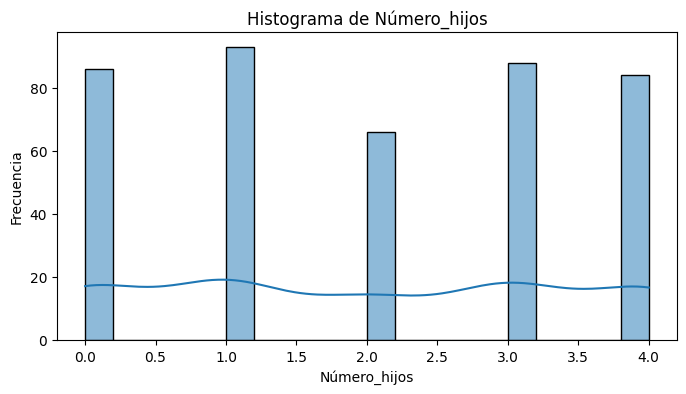

None


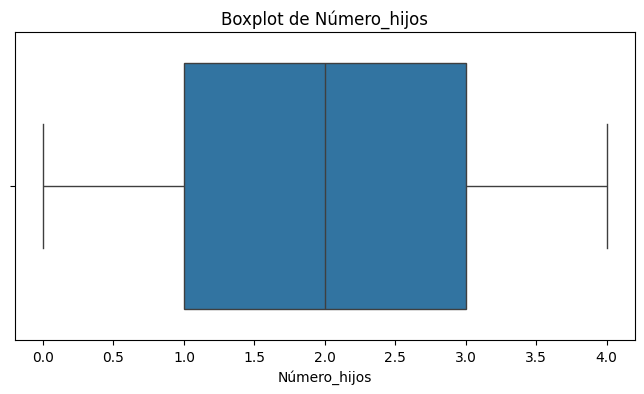

None


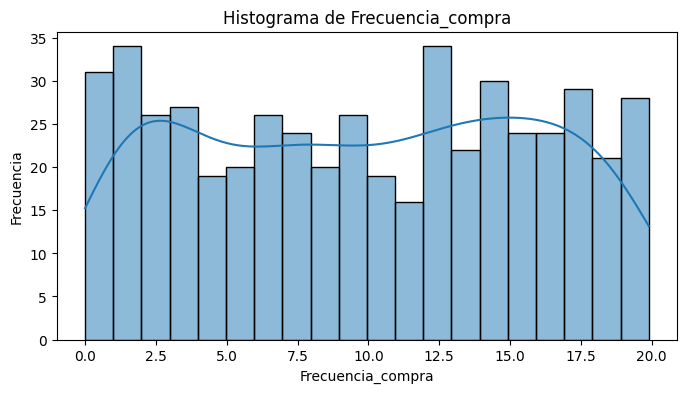

None


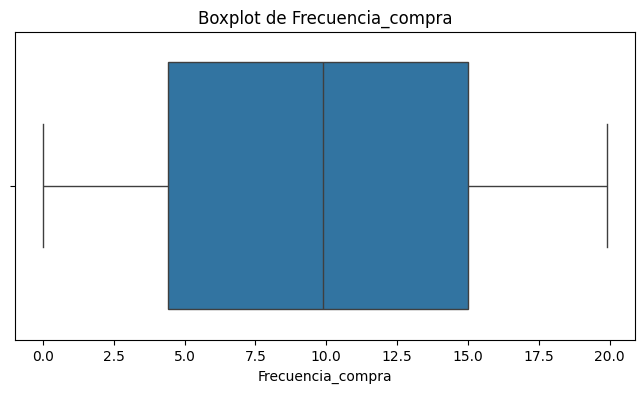

None


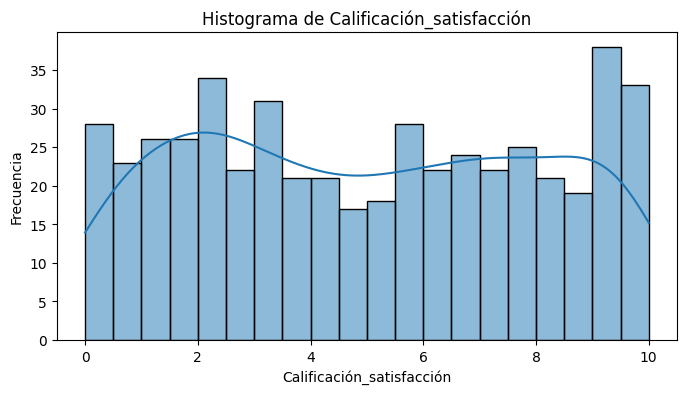

None


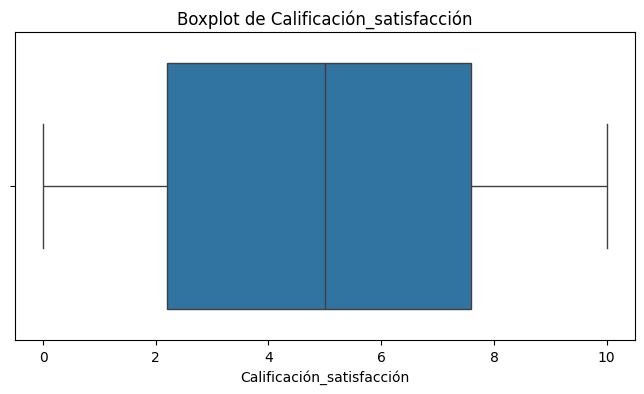

None


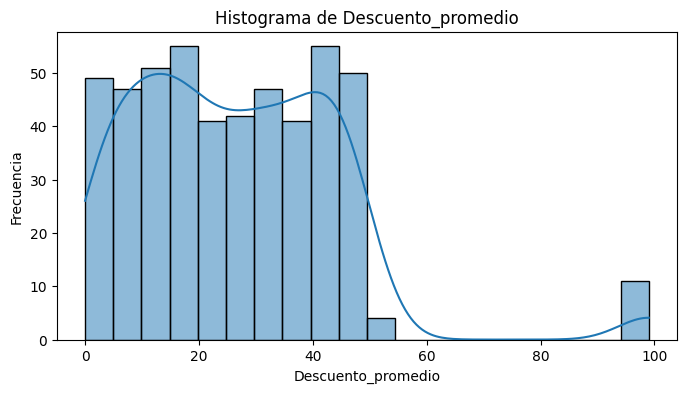

None


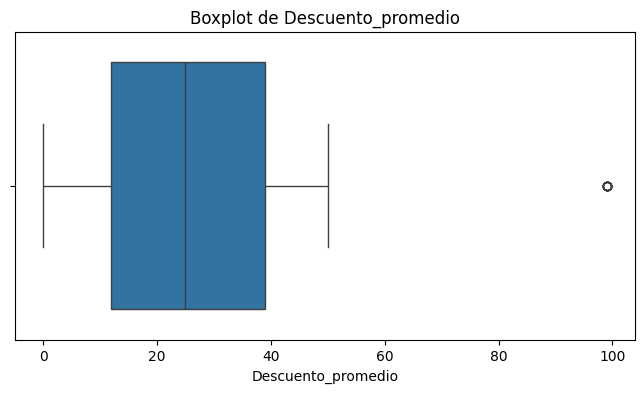

None


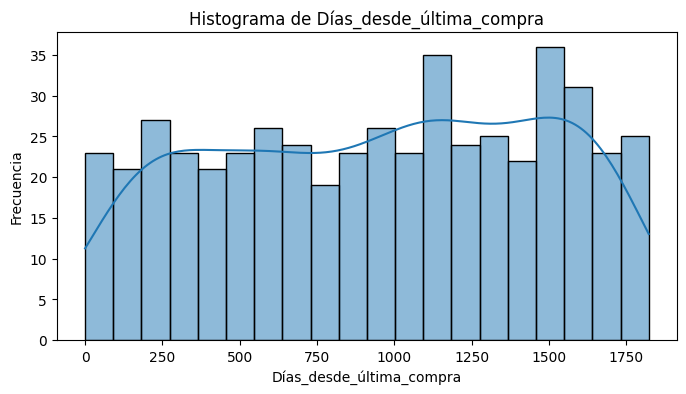

None


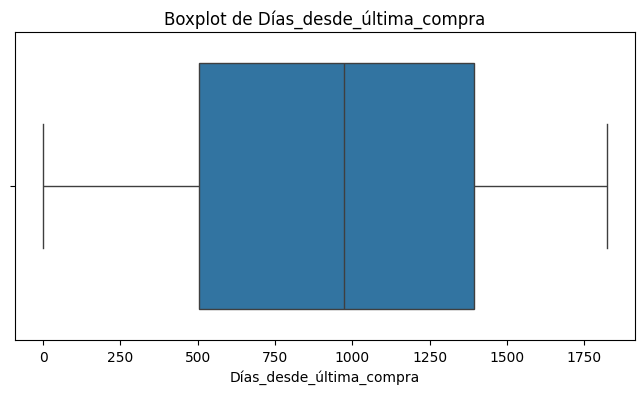

None


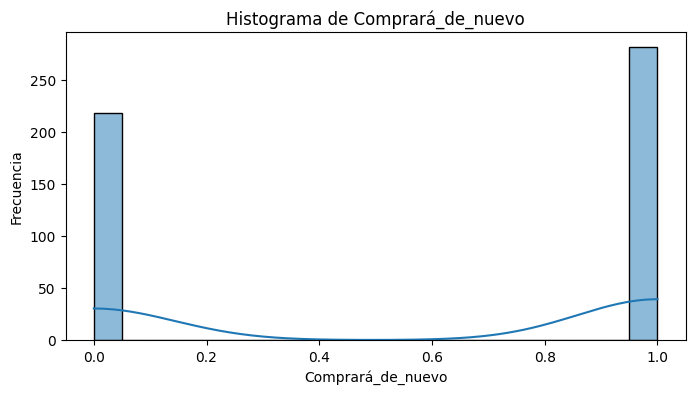

None


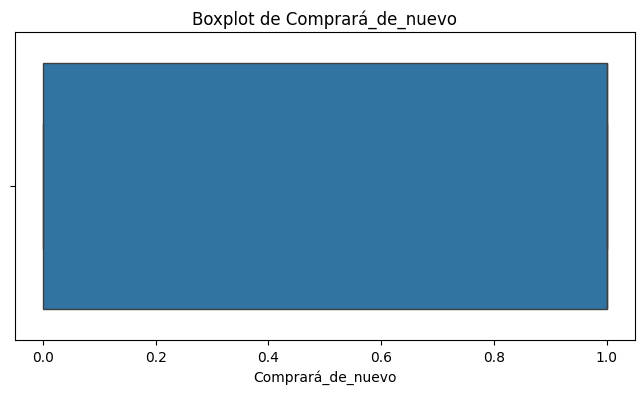

None
['Edad', 'Descuento_promedio']


In [6]:
#Obtenemos los nombres de las columnas numéricas.
num_cols = df.select_dtypes(include=["float64","int64"]).columns.tolist()
#Eliminamos 
num_cols.remove('Código_postal')
num_cols.remove('Activo')

col_outliers = []

#Histogramas con KDE y boxplot.
for i in num_cols:
    #Histogramas.
    plt.figure(figsize=(8,4))
    sns.histplot(df[i], bins = 20, kde = True)
    plt.title(f'Histograma de {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    print(plt.show())

    #Boxplots.
    plt.figure(figsize=(8,4))
    sns.boxplot(x=i, data=df)
    plt.title(f'Boxplot de {i}')
    print(plt.show())

    #Identificación de outliers.
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower) | (df[i] > upper)]
    

    out = outliers.shape[0]
    if out > 0:
        col_outliers.append(i)
print(col_outliers)


In [7]:
df.loc[df["Edad"] > 100] = np.nan
df.loc[df["Descuento_promedio"] > 100] = np.nan

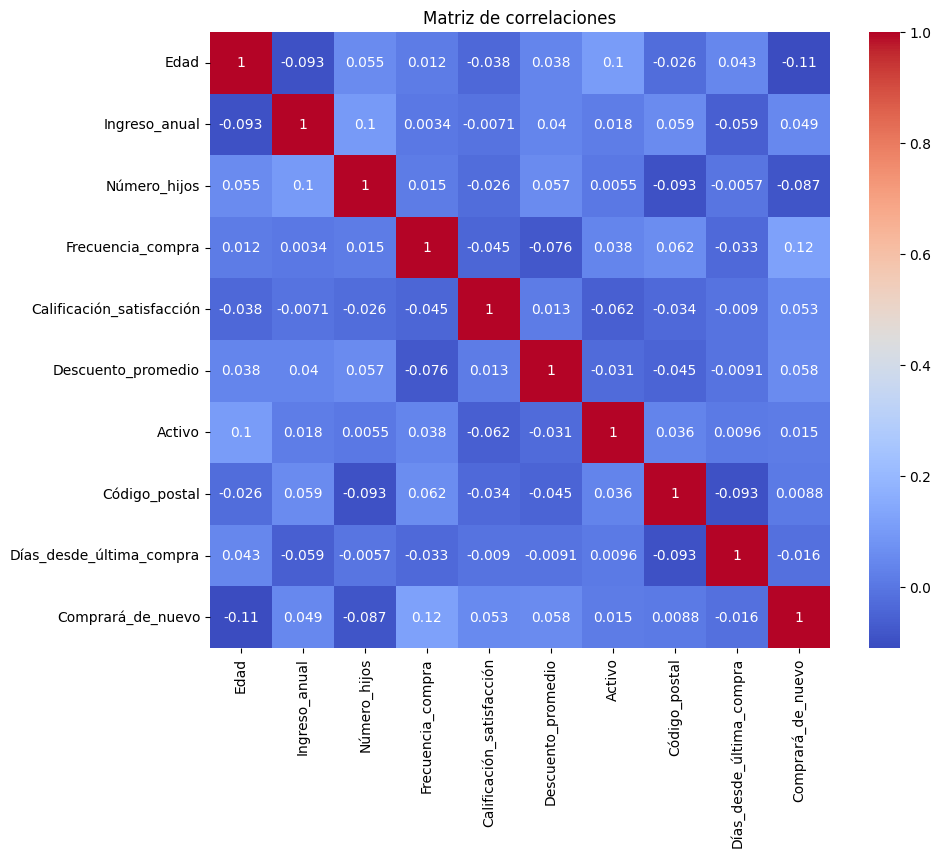

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlaciones')
plt.show()

In [9]:
#Imputar valores faltantes.

#Imputar edad con media.
imputer_media = SimpleImputer(strategy="mean")
df["Edad"] = imputer_media.fit_transform(df[["Edad"]])

#Imputar género con constante.
imputer_const = SimpleImputer(strategy="constant", fill_value="Otro")
df["Género"] = imputer_const.fit_transform(df[["Género"]]).ravel()

#Imputar Estado_civil con moda.
imputer_moda = SimpleImputer(strategy="most_frequent")
df["Estado_civil"] = imputer_moda.fit_transform(df[["Estado_civil"]]).ravel()

#Imputar Número_hijos con moda.
df["Número_hijos"] = imputer_moda.fit_transform(df[["Número_hijos"]]).ravel()

#Imputar Calificación con media.
df["Calificación_satisfacción"] = imputer_media.fit_transform(df[["Calificación_satisfacción"]])

#Imputar calificación con media.
df["Descuento_promedio"] = imputer_media.fit_transform(df[["Descuento_promedio"]])

#Imputar Rango_crediticio con constante.
imputer_const = SimpleImputer(strategy="constant", fill_value="Medio")
df["Rango_crediticio"] = imputer_const.fit_transform(df[["Rango_crediticio"]]).ravel()

#Imputar Activo con KNN.
knn_imputer = KNNImputer(n_neighbors=3)
df["Activo"] = knn_imputer.fit_transform(df[["Frecuencia_compra","Días_desde_última_compra"]])[:,[0]]


df.head()

,Edad,Género,Estado_civil,Ingreso_anual,Número_hijos,País,Frecuencia_compra,Calificación_satisfacción,Producto_frecuente,Descuento_promedio,Activo,Código_postal,Comentarios_cliente,Días_desde_última_compra,Rango_crediticio,Comprará_de_nuevo
0,56.0,Otro,Soltero,113145.0,3.0,México,7.5,4.7,Hogar,39.0,7.5,10223.0,Eat care even treatment also whether camera.,428.0,Bajo,1.0
1,69.0,M,Soltero,156430.0,0.0,Colombia,12.1,0.2,Electrónica,49.0,12.1,41752.0,Require alone back close may worker of goal.,1292.0,Medio,1.0
2,46.0,M,Soltero,104914.0,1.0,Chile,18.1,9.4,Belleza,9.0,18.1,38085.0,Source difficult think girl group.,1732.0,Alto,1.0
3,32.0,Otro,Soltero,112870.0,0.0,Argentina,11.5,1.9,Hogar,24.0,11.5,72994.0,Lead rock grow money story case.,1560.0,Bajo,1.0
4,60.0,Otro,Divorciado,126243.0,3.0,Argentina,8.0,8.0,Ropa,99.0,8.0,79120.0,Receive number pass people gun.,147.0,Premium,1.0


In [10]:
#Categóricas.
#Género, Estado_civil, País, Producto_frecuente, Rango_crediticio.
orden_crediticio = [["Bajo", "Medio", "Alto", "Premium"]]
ordinal_encoder = OrdinalEncoder(categories=orden_crediticio)
df["Rango_crediticio"] = ordinal_encoder.fit_transform(df[["Rango_crediticio"]])

oh_cols = ["Género", "Estado_civil", "País", "Producto_frecuente"]
df = pd.get_dummies(df, columns=oh_cols, drop_first=True)

df.head()

,Edad,Ingreso_anual,Número_hijos,Frecuencia_compra,Calificación_satisfacción,Descuento_promedio,Activo,Código_postal,Comentarios_cliente,Días_desde_última_compra,...,Estado_civil_Divorciado,Estado_civil_Soltero,Estado_civil_Viudo,País_Chile,País_Colombia,País_México,Producto_frecuente_Deportes,Producto_frecuente_Electrónica,Producto_frecuente_Hogar,Producto_frecuente_Ropa
0,56.0,113145.0,3.0,7.5,4.7,39.0,7.5,10223.0,Eat care even treatment also whether camera.,428.0,...,False,True,False,False,False,True,False,False,True,False
1,69.0,156430.0,0.0,12.1,0.2,49.0,12.1,41752.0,Require alone back close may worker of goal.,1292.0,...,False,True,False,False,True,False,False,True,False,False
2,46.0,104914.0,1.0,18.1,9.4,9.0,18.1,38085.0,Source difficult think girl group.,1732.0,...,False,True,False,True,False,False,False,False,False,False
3,32.0,112870.0,0.0,11.5,1.9,24.0,11.5,72994.0,Lead rock grow money story case.,1560.0,...,False,True,False,False,False,False,False,False,True,False
4,60.0,126243.0,3.0,8.0,8.0,99.0,8.0,79120.0,Receive number pass people gun.,147.0,...,True,False,False,False,False,False,False,False,False,True


In [11]:
scale_cols = ["Ingreso_anual","Descuento_promedio"]

ss = StandardScaler()
df[scale_cols] = ss.fit_transform(df[scale_cols])

df.head()

,Edad,Ingreso_anual,Número_hijos,Frecuencia_compra,Calificación_satisfacción,Descuento_promedio,Activo,Código_postal,Comentarios_cliente,Días_desde_última_compra,...,Estado_civil_Divorciado,Estado_civil_Soltero,Estado_civil_Viudo,País_Chile,País_Colombia,País_México,Producto_frecuente_Deportes,Producto_frecuente_Electrónica,Producto_frecuente_Hogar,Producto_frecuente_Ropa
0,56.0,0.080585,3.0,7.5,4.7,0.699358,7.5,10223.0,Eat care even treatment also whether camera.,428.0,...,False,True,False,False,False,True,False,False,True,False
1,69.0,0.867947,0.0,12.1,0.2,1.252143,12.1,41752.0,Require alone back close may worker of goal.,1292.0,...,False,True,False,False,True,False,False,True,False,False
2,46.0,-0.069139,1.0,18.1,9.4,-0.958996,18.1,38085.0,Source difficult think girl group.,1732.0,...,False,True,False,True,False,False,False,False,False,False
3,32.0,0.075582,0.0,11.5,1.9,-0.129819,11.5,72994.0,Lead rock grow money story case.,1560.0,...,False,True,False,False,False,False,False,False,True,False
4,60.0,0.318840,3.0,8.0,8.0,4.016067,8.0,79120.0,Receive number pass people gun.,147.0,...,True,False,False,False,False,False,False,False,False,True


In [12]:
df.to_csv("dataset_preprocesado.csv",index=False)